In [53]:
from itertools import combinations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
%matplotlib inline

In [2]:
df = pd.read_csv('grad.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit    400 non-null int64
gre      400 non-null int64
gpa      400 non-null float64
rank     400 non-null int64
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
admit,400.0,0.3175,0.466087,0.00,0.00,0.000,1.00,1.0
gre,400.0,587.7000,115.516536,220.00,520.00,580.000,660.00,800.0
gpa,400.0,3.3899,0.380567,2.26,3.13,3.395,3.67,4.0
rank,400.0,2.4850,0.944460,1.00,2.00,2.000,3.00,4.0


In [10]:
school = pd.crosstab(index=df['admit'], columns=df['rank']) 

In [16]:
school

rank,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


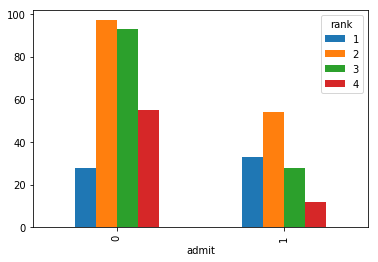

In [13]:
school.plot(kind="bar") 

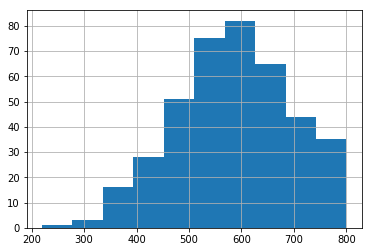

In [14]:
df['gre'].hist()

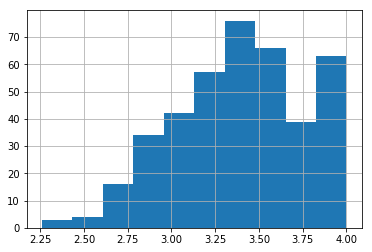

In [15]:
df['gpa'].hist()

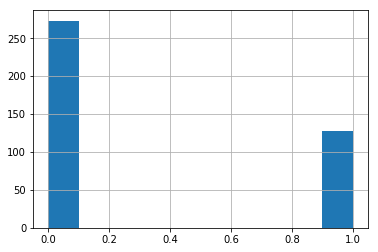

In [18]:
df['admit'].hist()

In [42]:
df2 = df.groupby(['admit'])['admit'].agg(['count']).reset_index()

In [48]:
df2

,admit,count
0,0,273
1,1,127


In [46]:
admit_count = pd.crosstab(index=df2['admit'], columns=df2['count']) 

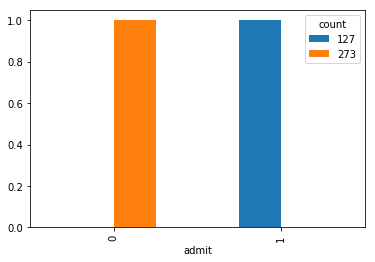

In [47]:
admit_count.plot(kind="bar") 

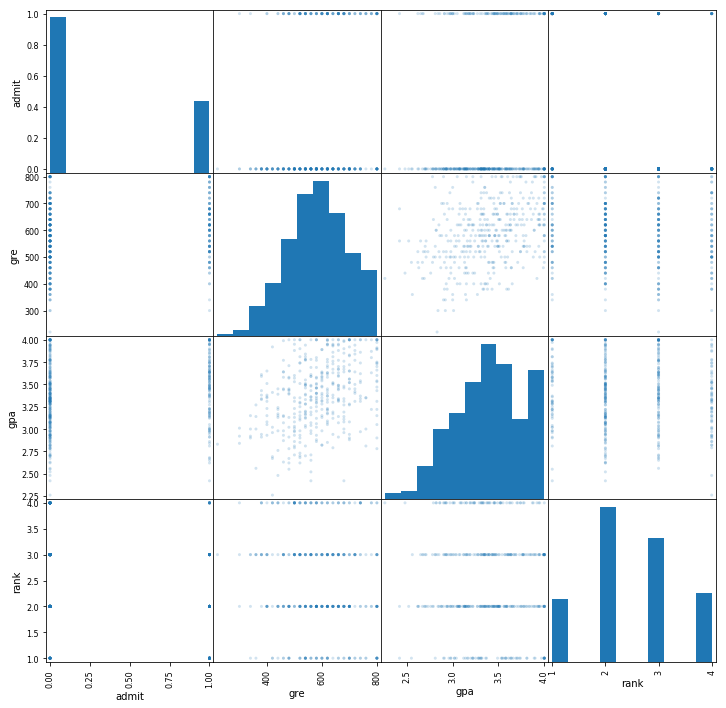

In [49]:
scatter_matrix(df, alpha=0.2, figsize =(12,12))
None

In [51]:
df.columns

Index(['admit', 'gre', 'gpa', 'rank'], dtype='object')

In [54]:
from itertools import combinations
rows = []
for i in range(1,4):
    combos = list(combinations(['gre', 'gpa', 'rank'],i))
    for j,com in enumerate(combos):
        y = df.admit
        X = pd.DataFrame(df, columns=com)
        # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=22)
        model = LogisticRegression(fit_intercept=True)
        score = cross_val_score(model, X, y, cv=20, scoring='accuracy').mean()
        s = ', '.join(com)
        rows.append({'Score':score, 'Combos':s,})
        # print('score:', score, 'columns:', s)
df1 = pd.DataFrame(rows)
df1.head()

,Combos,Score
0,gre,0.682807
1,gpa,0.682807
2,rank,0.664887
3,"gre, gpa",0.682807
4,"gre, rank",0.694461


In [55]:
df1

,Combos,Score
0,gre,0.682807
1,gpa,0.682807
2,rank,0.664887
3,"gre, gpa",0.682807
4,"gre, rank",0.694461
5,"gpa, rank",0.709355
6,"gre, gpa, rank",0.707105


In [56]:
df1.iloc[df1.Score.idxmax()]

Combos    gpa, rank
Score      0.709355
Name: 5, dtype: object

In [57]:
m1 = LogisticRegression().fit(df[['gpa', 'rank']], df.admit)

In [58]:
m1.coef_

array([[ 0.58204208, -0.61585648]])

In [59]:
m1.intercept_

array([-1.26281992])

In [60]:
y = df.admit
X = pd.DataFrame(df, columns=['gpa','rank'])

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=22)

In [62]:
y_hat = m1.predict(X_test)

In [148]:
model.score(X_test, y_test) 

0.84848484848484851

In [63]:
confusion_matrix(y_test, y_hat)

array([[94,  5],
       [26,  7]], dtype=int64)

In [64]:
recall = 7/(7+26)
precision = 7/(7+5)

In [65]:
recall

0.21212121212121213

In [66]:
precision

0.5833333333333334

In [67]:
m1.score(X_test, y_test)

0.76515151515151514